In [94]:
import datetime, mmap,os,re, sys, decimal, hddm
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy as sp
from misc import sdt_calc
from patsy import dmatrix
% matplotlib inline 
% load_ext rpy2.ipython
#%R library(lsmeans)
#%R library(afex)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [95]:
path2data = '/Users/mlm2/Work/Expts/StressMem/Data/Beh_Pilots/'

adding in our 5 pilots...

In [96]:
data = pd.read_csv(path2data + 'Pilot4_StressMem_Retrieval_1.csv')
data = data.append(pd.read_csv(path2data + 'Pilot5_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot3_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot2_StressMem_Retrieval_1.csv'))
data = data.append(pd.read_csv(path2data + 'Pilot1_StressMem_Retrieval_1.csv'))
data.head(10)

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur
0,Pilot4,1,1,annoying,new,6,1.850,NaN,NaN,999.000,501
1,Pilot4,1,2,miserable,new,5,0.417,NaN,NaN,999.000,501
2,Pilot4,1,3,heartbroken,new,5,1.017,NaN,NaN,999.000,501
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501
5,Pilot4,1,6,smart,new,3,1.467,NaN,NaN,999.000,1002
6,Pilot4,1,7,terrified,new,5,0.636,NaN,NaN,999.000,501
7,Pilot4,1,8,uninvited,old,3,2.201,Describes_you,NaN,999.000,2004
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501
9,Pilot4,1,10,coward,new,3,1.620,NaN,NaN,999.000,1002


In [97]:
data.loc[(data['recog_resp'] <= 3) & (data['status'] == 'old'), 'recog_result'] = 'hit'
data.loc[(data['recog_resp'] <= 3) & (data['status'] == 'new'), 'recog_result'] = 'fas'
data.loc[(data['recog_resp'] > 3) & (data['status'] == 'new'), 'recog_result'] = 'crs'
data.loc[(data['recog_resp'] > 3) & (data['status'] == 'old'), 'recog_result'] = 'misses'
data.head(10)

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur,recog_result
0,Pilot4,1,1,annoying,new,6,1.850,NaN,NaN,999.000,501,crs
1,Pilot4,1,2,miserable,new,5,0.417,NaN,NaN,999.000,501,crs
2,Pilot4,1,3,heartbroken,new,5,1.017,NaN,NaN,999.000,501,crs
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501,hit
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501,hit
5,Pilot4,1,6,smart,new,3,1.467,NaN,NaN,999.000,1002,fas
6,Pilot4,1,7,terrified,new,5,0.636,NaN,NaN,999.000,501,crs
7,Pilot4,1,8,uninvited,old,3,2.201,Describes_you,NaN,999.000,2004,hit
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501,hit
9,Pilot4,1,10,coward,new,3,1.620,NaN,NaN,999.000,1002,fas


In [98]:
data.recog_result.value_counts()

crs       172
hit       137
fas        60
misses     38
Name: recog_result, dtype: int64

In [99]:
# in the order hits, misses, fas, crs
rates = [data.recog_result.value_counts().hit,
         data.recog_result.value_counts().misses,
         data.recog_result.value_counts().fas, 
         data.recog_result.value_counts().crs]

Overall...

In [100]:
sdt_calc(rates)

{'Ad': 0.84394315150333354,
 'FAR': 0.25862068965517243,
 'HR': 0.78285714285714281,
 'beta': 0.4126764200736763,
 'c': -0.067137685844678052,
 'dprime': 1.4294825375393114}

For each subject...

In [101]:
subject_list = [data.groupby('subject').recog_result.value_counts().Pilot1, 
            data.groupby('subject').recog_result.value_counts().Pilot2, 
            data.groupby('subject').recog_result.value_counts().Pilot3, 
            data.groupby('subject').recog_result.value_counts().Pilot4, 
            data.groupby('subject').recog_result.value_counts().Pilot5]
for item in subject_list:
    rates = [item.hit,
            item.misses,
            item.fas,
            item.crs]
    print (sdt_calc(rates))
    print ('\n')


{'beta': 2.191224132615773, 'dprime': 2.8656084216509878, 'Ad': 0.97863252103766396, 'HR': 0.88, 'FAR': 0.045454545454545456, 'c': 0.25781741875940367}


{'beta': 0.19328400994787834, 'dprime': 0.79824614956456963, 'Ad': 0.71377442980582317, 'HR': 0.83999999999999997, 'FAR': 0.57777777777777772, 'c': -0.59533480842746822}


{'beta': 0.31709967487113483, 'dprime': 1.7249060602079189, 'Ad': 0.88870931868865566, 'HR': 0.83999999999999997, 'FAR': 0.23255813953488372, 'c': -0.13200485310579357}


{'beta': 0.08641179438026964, 'dprime': 1.8727703594241412, 'Ad': 0.90728975596780481, 'HR': 0.92000000000000004, 'FAR': 0.32000000000000001, 'c': -0.46868638059756229}


{'beta': 1.9686732697834326, 'dprime': 1.2754205125775602, 'Ad': 0.81643397867972112, 'HR': 0.54000000000000004, 'FAR': 0.12, 'c': 0.53727653577731027}




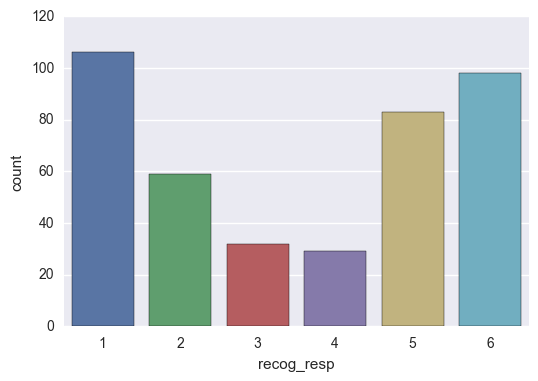

In [102]:
resp_plot = sns.countplot(x="recog_resp", data=data, order=[1,2,3,4,5,6])

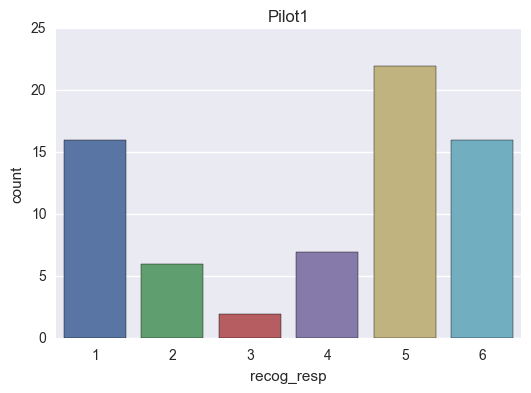

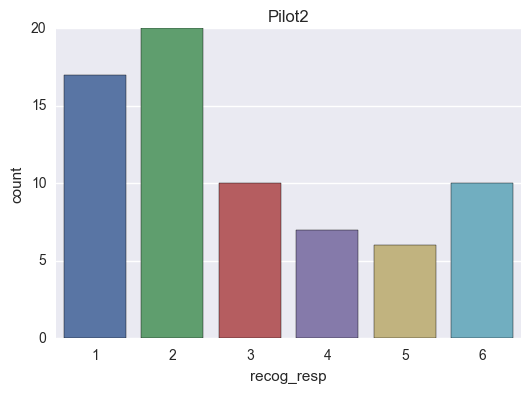

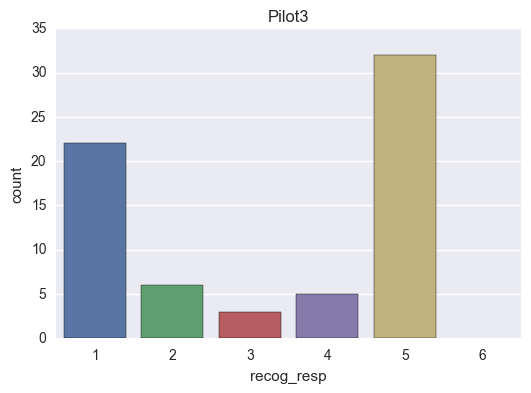

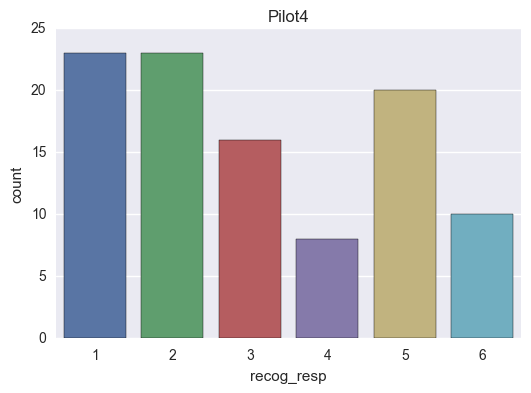

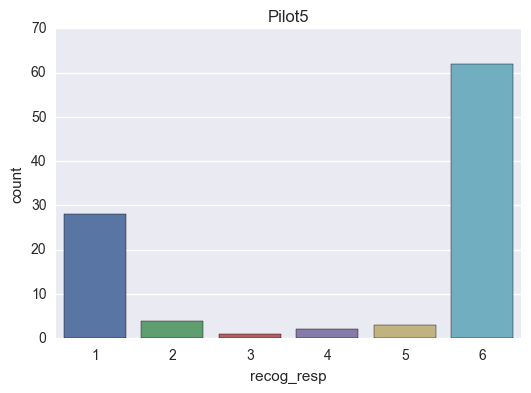

In [118]:
sublist = ['Pilot1', 'Pilot2', 'Pilot3', 'Pilot4', 'Pilot5']
for sub in sublist:
    plt.figure()
    resp_count = sns.countplot(x="recog_resp", data=data[data.subject == sub], order=[1,2,3,4,5,6])
    sns.plt.title(sub)

## Source

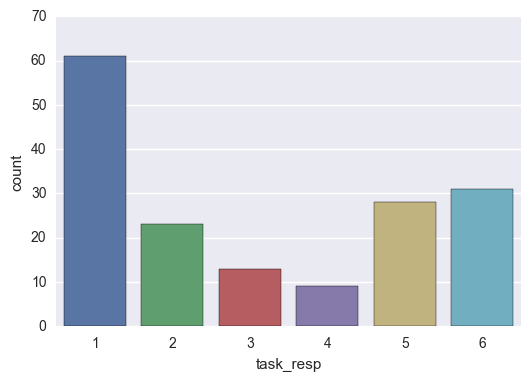

In [103]:
task_plot = sns.countplot(x="task_resp", data=data, order=[1,2,3,4,5,6])

In [108]:
hits = data.loc[(data['recog_result'] == 'hit') & (data['task_rt'] < 999)]
hits.head()

,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur,recog_result
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501,hit
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501,hit
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501,hit
10,Pilot4,1,11,witty,old,1,0.567,Describes_you,6.0,0.550,1002,hit
13,Pilot4,1,14,immoral,old,1,0.917,Emotion,1.0,1.567,501,hit


In [109]:
hits['source_correct'] = 0
hits.loc[(hits['task'] == 'Describes_you') & (hits['task_resp'] > 3), 'source_correct'] = 1
hits.loc[(hits['task'] == 'Emotion') & (hits['task_resp'] < 4), 'source_correct'] = 1
hits

/Users/mlm2/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/mlm2/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,subject,session,trial,word,status,recog_resp,recog_rt,task,task_resp,task_rt,iti_dur,recog_result,source_correct
3,Pilot4,1,4,grumpy,old,1,1.767,Describes_you,6.0,0.800,501,hit,1
4,Pilot4,1,5,confident,old,1,0.584,Describes_you,5.0,1.400,501,hit,1
8,Pilot4,1,9,expert,old,1,0.717,Describes_you,6.0,2.034,501,hit,1
10,Pilot4,1,11,witty,old,1,0.567,Describes_you,6.0,0.550,1002,hit,1
13,Pilot4,1,14,immoral,old,1,0.917,Emotion,1.0,1.567,501,hit,1
14,Pilot4,1,15,happy,old,1,0.400,Describes_you,6.0,0.567,501,hit,1
15,Pilot4,1,16,charm,old,2,0.534,Emotion,5.0,0.567,1002,hit,0
16,Pilot4,1,17,champ,old,1,0.767,Describes_you,1.0,0.684,1002,hit,0
19,Pilot4,1,20,dynamo,old,1,0.767,Emotion,1.0,0.384,2004,hit,1
22,Pilot4,1,23,phony,old,2,0.550,Describes_you,4.0,0.834,501,hit,1


In [111]:
hits.source_correct.value_counts()

1    98
0    26
Name: source_correct, dtype: int64

In [112]:
hits.groupby('subject').source_correct.value_counts()

subject  source_correct
Pilot1   1                 18
         0                  2
Pilot2   1                 13
         0                  6
Pilot3   1                 18
         0                  2
Pilot4   1                 29
         0                  9
Pilot5   1                 20
         0                  7
Name: source_correct, dtype: int64

In [113]:
hits.groupby('task').source_correct.value_counts()

task           source_correct
Describes_you  1                 48
               0                 19
Emotion        1                 50
               0                  7
Name: source_correct, dtype: int64

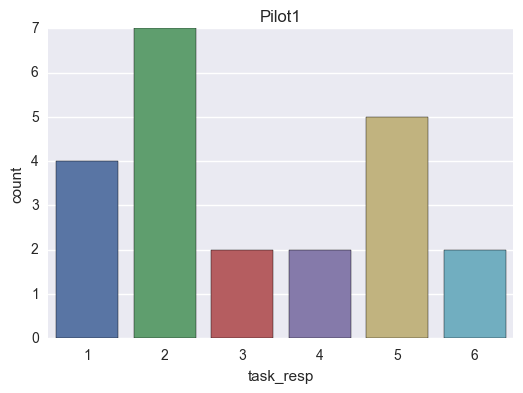

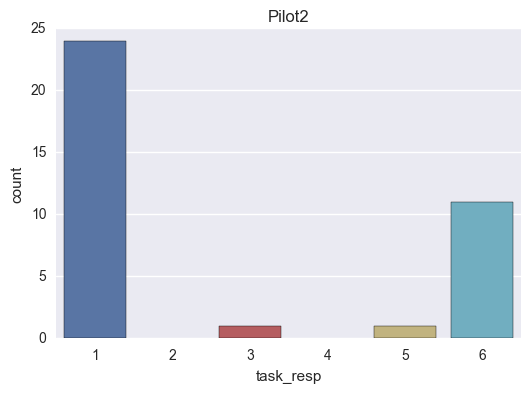

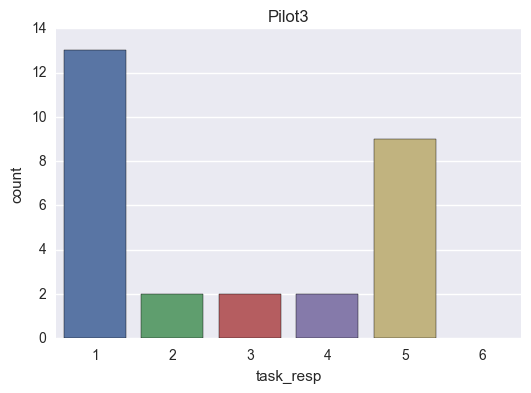

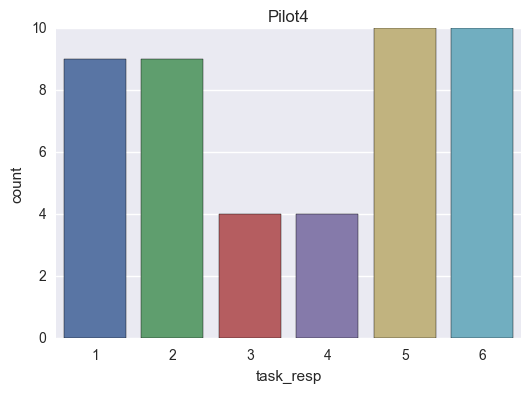

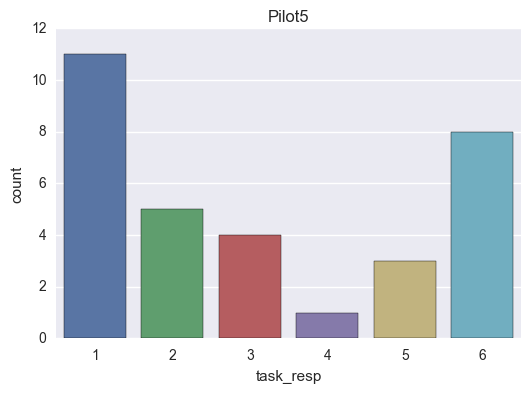

In [119]:
sublist = ['Pilot1', 'Pilot2', 'Pilot3', 'Pilot4', 'Pilot5']
for sub in sublist:
    plt.figure()
    resp_count = sns.countplot(x="task_resp", data=data[data.subject == sub], order=[1,2,3,4,5,6])
    sns.plt.title(sub)